# Etapa 1 - Atividades


In [19]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#---------------------------------------------------VARIAVEIS-----------------------------------------------------------
# primario
r1 = 0.5
l1 = 196 * 10**(-6)
c1 = 0.1 * 10**(-6)
#secundario
r2 = 0.5
l2 = 196 * 10**(-6)
c2 = 0.1 * 10**(-6)
rc = 10
#outros
freq = 36000
v1 = 5
k = 0.1

## 1)Elaboração do diagrama do modelo eletrodinâmico do circuito WPT:

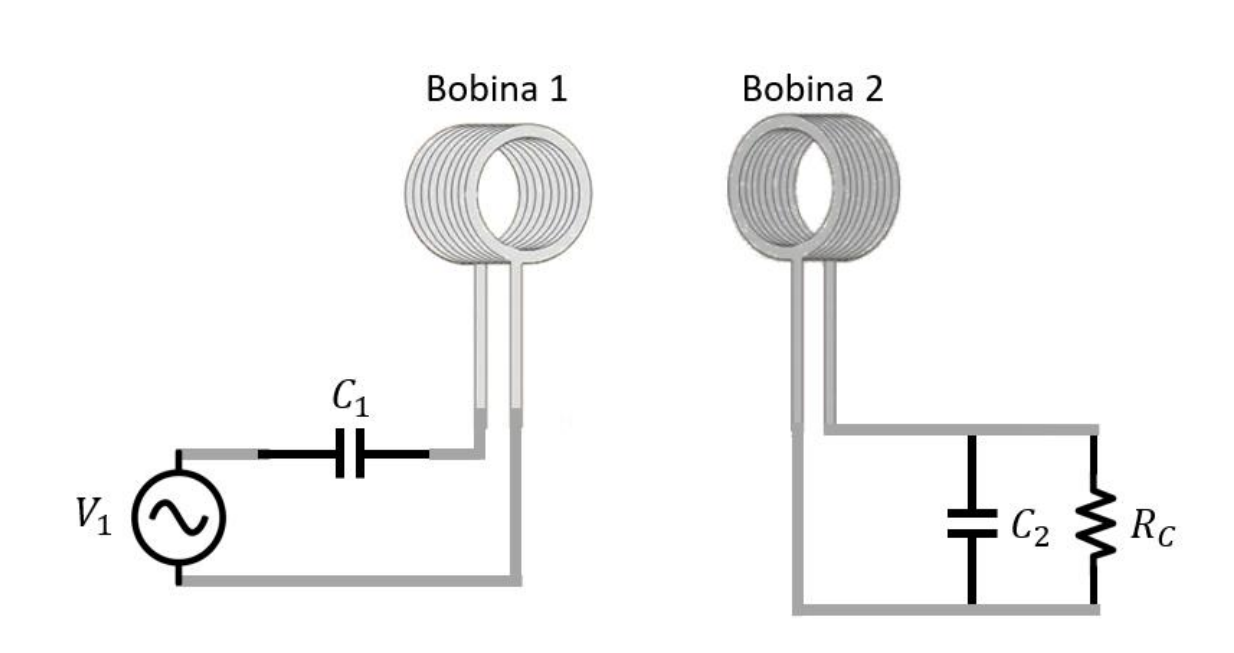

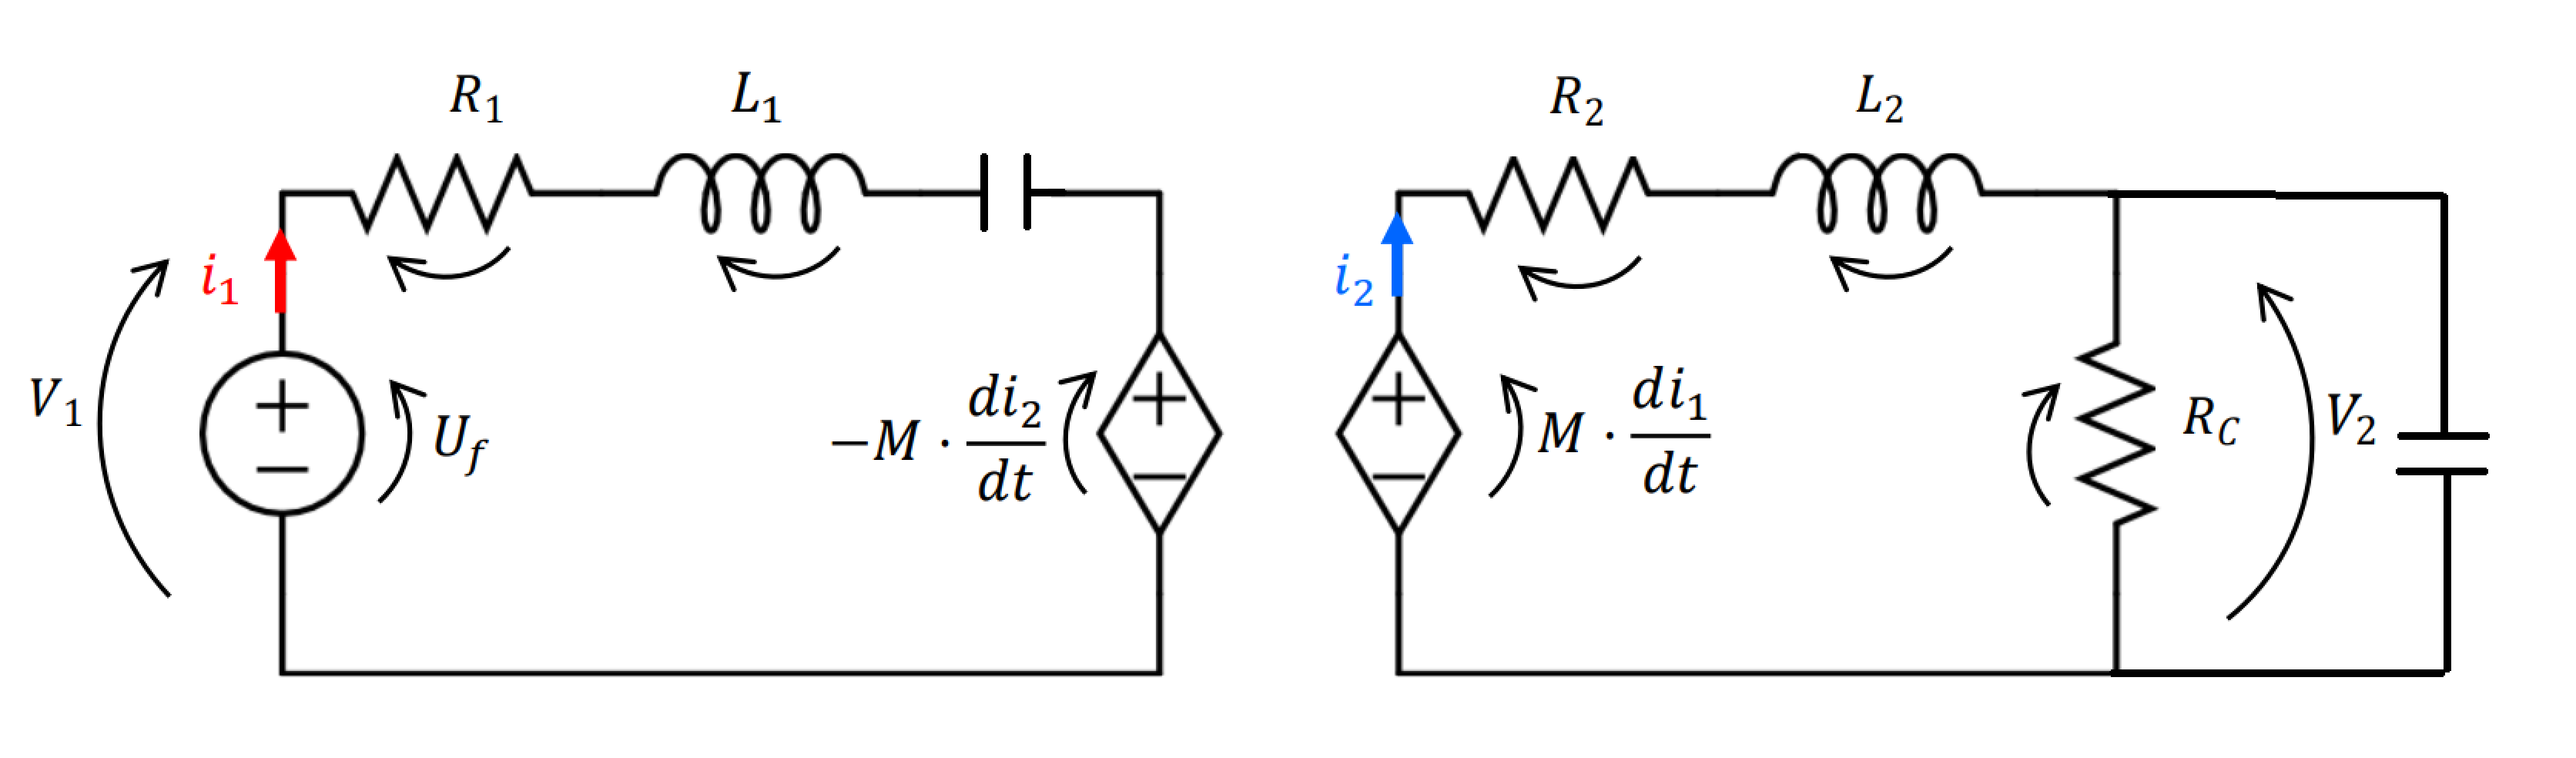

Frequência de ressonancia para cirtuico LC:
f = 1 / (2π √L C)

In [21]:
freq_res = 1/(2*pi*sqrt(l1*c1))
print("Frequencia de ressonancia: {0} Hz".format(freq_res))

Frequencia de ressonancia: (35949.43721749074+0j) Hz


## 2) Código do modelo numérico:

In [29]:
#---------------------------------------------------FUNÇÃO-----------------------------------------------------------
def CalcularTransformador(v1,rc,r1,freq,k,r2):
    #Frequência angular
    w = 2*pi*freq

    #Reatâncias indutivas de L1
    xl1 = 1j*w*l1     
    
    #Reatâncias indutivas de C1
    xc1 = 1/(1j*w*c1)
    
    #Reatâncias indutivas de L2
    xl2 = 1j*w*l2
    
    #Reatâncias indutivas de C2
    xc2 = 1/(1j*w*c2)
    
    #Indutância Mútua
    M = k*(sqrt(l1*l2))
    
    #Reatâncias indutivas mútua
    xm = 1j*w*M      
    
    #Reatâncias equivalente capacitor e resistor
    Xeq = (rc*xc2)/(rc+xc2)
    
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, xl2+r2+Xeq]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1], Xeq

In [30]:
#validando o modelo
CalcularTransformador(5,10,0.5,36000,0.1,0.5)

((6.48910212260819+3.3979847017150155j),
 (0.5653779404716929+0.49134241873886925j),
 (9.513263127416526-2.1518494237986063j))

___
## 3) Construção de gráficos de I1 e I2 em função da frequência:

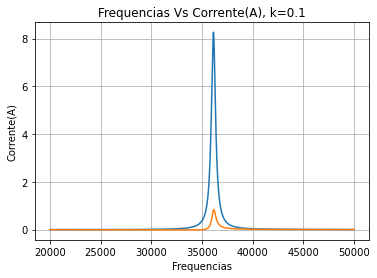

In [41]:
valores_freq = np.arange(2*10**4, 5*10**4, 0.5).tolist()
lista_i1 = []
lista_i2 = []
for frequencias in valores_freq:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    lista_i1.append(i1)
    lista_i2.append(i2)

plt.plot(valores_freq,lista_i1)
plt.plot(valores_freq,lista_i2)
plt.xlabel("Frequencias")
plt.ylabel("Corrente(A)")
plt.title("Frequencias Vs Corrente(A), k=0.1")
plt.grid()

In [32]:
maior_corrente = max(lista_i2)
for i in range(0, len(lista_i2)):
    if lista_i2[i] == maior_corrente:
        indice = i
frequencia_ressonancia = valores_freq[indice]
print("Frequencia de ressonancia = {0} Hz".format(frequencia_ressonancia))

Frequencia de ressonancia = 36158.5 Hz


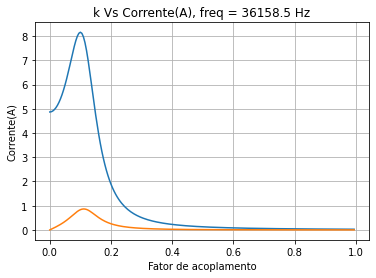

In [40]:
#variando o K
valores_k = np.arange(0, 1, 0.005).tolist()
lista_i1 = []
lista_i2 = []
for valores in valores_k:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencia_ressonancia,valores,r2)
    
    lista_i1.append(i1)
    lista_i2.append(i2)

plt.plot(valores_k,lista_i1)
plt.plot(valores_k,lista_i2)
plt.xlabel("Fator de acoplamento")
plt.ylabel("Corrente(A)")
plt.title("k Vs Corrente(A), freq = 36158.5 Hz")
plt.grid()

___

## 4)  Construção de gráficos das potências e da eficiência em função da frequência:

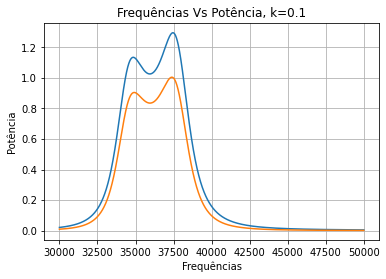

In [39]:
valores_freq = np.arange(3*10**4, 5*10**4, 0.5).tolist()
lista_P1 = []
lista_P2 = []
for frequencias in valores_freq:    
    resposta = CalcularTransformador(10/pi,400,r1,frequencias,0.11,r2)
    i1,i2,xeq = resposta
    s1 = (10/pi*(i1.conjugate()))/2
    #pegando a parte ativa
    P1 = s1.real
    lista_P1.append(P1)
    
    s2 = (xeq*i2*i2.conjugate())/2
    #pegando a parte ativa
    P2 = s2.real
    lista_P2.append(P2)

plt.plot(valores_freq,lista_P1)
plt.plot(valores_freq,lista_P2)
plt.xlabel("Frequências")
plt.ylabel("Potência")
plt.title("Frequências Vs Potência, k=0.1")
plt.grid()